In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

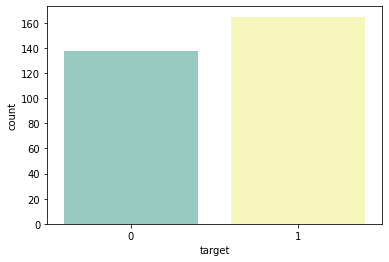

In [6]:
#Univariate analysis target.
sns.countplot(df['target'], palette='Set3')

<AxesSubplot:xlabel='age'>

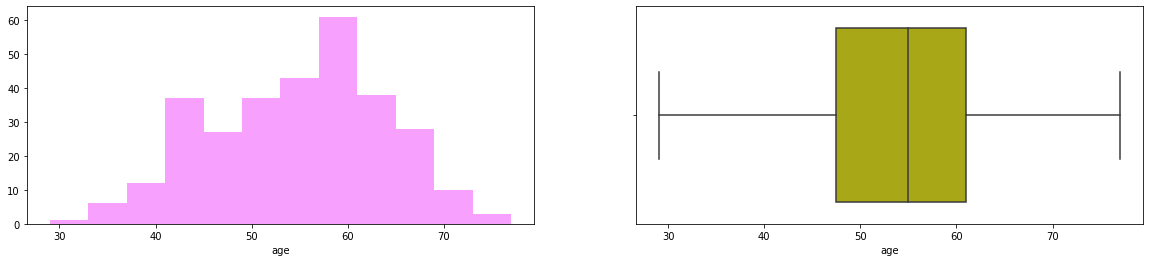

In [7]:
#Univariate analysis age.

f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(df['age'], kde=False, color='#ec12fd')

f.add_subplot(1,2,2)
sns.boxplot(df['age'], color='y')

<AxesSubplot:xlabel='fbs', ylabel='count'>

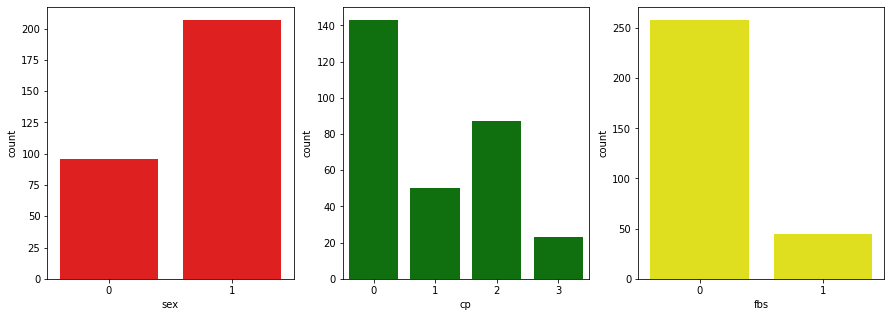

In [8]:
#Univariate analysis sex: 1=male; 0=female.
#Univariate analysis chest pain type (cp): 0=typical angina; 1=atypical angine; 2=non-anginal pain; 3=asymptomatic
#Univariate analysis fasting blood sugar: 1 if > 120 mg/dl; 0 otherwise.

f = plt.figure(figsize=(15,5))

f.add_subplot(1,3,1)
sns.countplot(df['sex'], color='red')

f.add_subplot(1,3,2)
sns.countplot(df['cp'], color='green')

f.add_subplot(1,3,3)
sns.countplot(df['fbs'], color='yellow')

In [9]:
#Membuat object KNN
knn = KNeighborsClassifier()
#Membuat variable x dan y
x = df.drop(columns=['target'])
y = df['target']

#Split data kedalam training dan testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

#Training the model
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [10]:
#Predict testing set
y_pred = knn.predict(x_test)

In [11]:
#Check performa model menggunakan classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.52      0.50        25
           1       0.65      0.61      0.63        36

    accuracy                           0.57        61
   macro avg       0.56      0.57      0.56        61
weighted avg       0.58      0.57      0.58        61



In [12]:
roc_auc_score(y_test, y_pred)

0.5655555555555556

In [13]:
from feijoa import create_job, Experiment, SearchSpace, Real, Integer

In [14]:
def objective(experiment: Experiment):
    k_neighbours = experiment.params.get('k_neighbours')
    p = experiment.params.get('p')
    
    knn = KNeighborsClassifier(n_neighbors=k_neighbours, p=p)
    knn.fit(x_train, y_train)
    
    y_pred = knn.predict(x_test)
    
    return -roc_auc_score(y_test, y_pred)

In [15]:
space = SearchSpace()
space.insert(Integer('k_neighbours', low=1, high=30))
space.insert(Integer('p', low=1, high=2))

In [16]:
job = create_job(search_space=space, storage='sqlite:///hearts_v2.db')

In [17]:
job.do(objective, n_trials=70, n_proc=3, algo_list=['grid'])

In [18]:
dataframe = job.dataframe

In [19]:
dataframe

,id,job_id,state,hash,objective_result,requestor,metrics,create_time,finish_time,k_neighbours,p
0,1,4,ExperimentState.OK,eb8314e9900cec7bc9d280be66f07637bfb6f1f6b377b7...,-0.727222,GridSearch,None,2022-06-19 17:34:53.269246,2022-06-19 17:34:53.367209,1,1
1,2,4,ExperimentState.OK,7e04b09f635a2ff68dba928d9b4b7fc45d39257370b6f6...,-0.531667,GridSearch,None,2022-06-19 17:34:53.371414,2022-06-19 17:34:53.403852,1,2
2,3,4,ExperimentState.OK,7926b29f4846eef39c8c09856c99f646a58f368cb1682e...,-0.683889,GridSearch,None,2022-06-19 17:34:53.406326,2022-06-19 17:34:53.439056,2,1
3,4,4,ExperimentState.OK,1cc4ee84e1961e3251ba1af12f27ea50b02cf00876428f...,-0.643889,GridSearch,None,2022-06-19 17:34:53.441498,2022-06-19 17:34:53.474894,2,2
4,5,4,ExperimentState.OK,060fb4d4f66b33e5b8206b2aa55bb1fde2c8039390c3ab...,-0.715000,GridSearch,None,2022-06-19 17:34:53.477309,2022-06-19 17:34:53.508822,3,1
5,6,4,ExperimentState.OK,a1442a6fb5dafb539682e20fba5770a15d9c8c0f13bf56...,-0.701111,GridSearch,None,2022-06-19 17:34:53.511211,2022-06-19 17:34:53.542626,3,2
6,7,4,ExperimentState.OK,f8cc208382dbafc8ec9f31a9052e74c6bb5ec88bb0b66e...,-0.761111,GridSearch,None,2022-06-19 17:34:53.545021,2022-06-19 17:34:53.579420,4,1
7,8,4,ExperimentState.OK,4ff5dd075ac84ecb7d817c5b4d606001ff4b61c15ef10e...,-0.705556,GridSearch,None,2022-06-19 17:34:53.582011,2022-06-19 17:34:53.614647,4,2
8,9,4,ExperimentState.OK,548a308133793bfac1114d1e17e24be091beeb2eeecc25...,-0.688889,GridSearch,None,2022-06-19 17:34:53.617162,2022-06-19 17:34:53.649198,5,1
9,10,4,ExperimentState.OK,63cec08cd8e5ffe80ec116e74dfd1df5886e6495d99ca3...,-0.565556,GridSearch,None,2022-06-19 17:34:53.651580,2022-06-19 17:34:53.682935,5,2


In [20]:
job.best_parameters

{'k_neighbours': 4, 'p': 1}

In [21]:
-job.best_value

0.7611111111111112

In [22]:
import matplotlib.pyplot as plt

X = dataframe['k_neighbours']
Y = dataframe['p']
Z = -dataframe['objective_result']

ddf_p2 = dataframe[dataframe['p'] == 2]

Text(0, 0.5, 'ROC AUC')

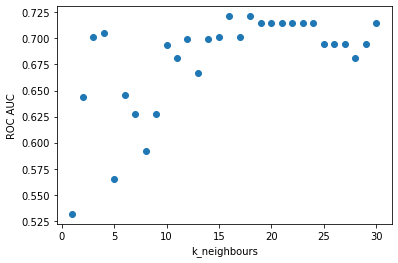

In [23]:
plt.scatter(ddf_p2['k_neighbours'], -ddf_p2['objective_result'])
plt.xlabel('k_neighbours')
plt.ylabel('ROC AUC')

Text(0, 0.5, 'ROC AUC')

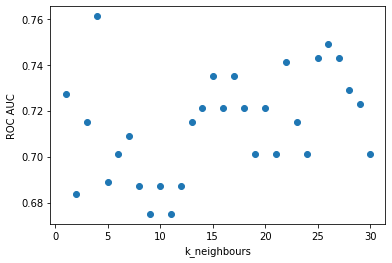

In [24]:
ddf_p1 = dataframe[dataframe['p'] == 1]
plt.scatter(ddf_p1['k_neighbours'], -ddf_p1['objective_result'])
plt.xlabel('k_neighbours')
plt.ylabel('ROC AUC')

In [25]:
#Membuat object KNN
knn = KNeighborsClassifier(n_neighbors=4, p=1)
#Membuat variable x dan y
x = df.drop(columns=['target'])
y = df['target']

#Split data kedalam training dan testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

#Training the model
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

#Check performa model menggunakan classification_report
print(classification_report(y_test, y_pred))

roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.67      0.80      0.73        25
           1       0.84      0.72      0.78        36

    accuracy                           0.75        61
   macro avg       0.75      0.76      0.75        61
weighted avg       0.77      0.75      0.76        61



0.7611111111111112